Linear Kernel - Mean Squared Error: 28.91852267161847, R^2 Score: 0.6056589279132574
Poly Kernel - Mean Squared Error: 25.82919767676698, R^2 Score: 0.6477858285273655
Rbf Kernel - Mean Squared Error: 25.668539678396044, R^2 Score: 0.6499766059760035
Sigmoid Kernel - Mean Squared Error: 38.151095072597, R^2 Score: 0.47976098561299174

Best Kernel: Rbf
Best Kernel - Mean Squared Error: 25.668539678396044, R^2 Score: 0.6499766059760035


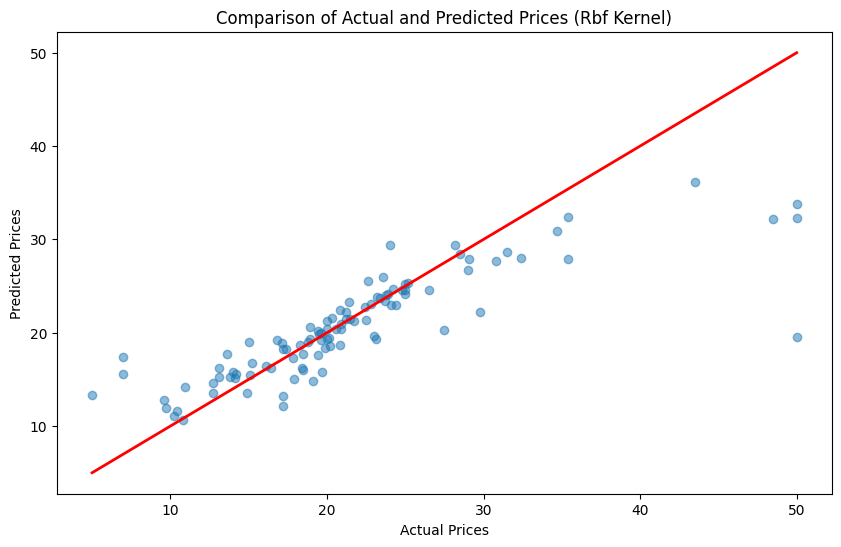

In [10]:
import pandas as pd
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the Boston housing dataset from OpenML
boston = fetch_openml(name='boston', version=1, as_frame=True)
X = boston.data
y = boston.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Function to train and evaluate the SVR model with different kernels
def evaluate_svr_kernel(kernel):
    svr = SVR(kernel=kernel)
    svr.fit(X_train_scaled, y_train)
    y_pred = svr.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return mse, r2, y_pred

# Evaluate different kernels
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
results = {}

for kernel in kernels:
    mse, r2, y_pred = evaluate_svr_kernel(kernel)
    results[kernel] = {
        'mse': mse,
        'r2': r2,
        'y_pred': y_pred
    }
    print(f"{kernel.capitalize()} Kernel - Mean Squared Error: {mse}, R^2 Score: {r2}")

# Find the best kernel based on the highest R^2 score
best_kernel = max(results, key=lambda k: results[k]['r2'])
best_mse = results[best_kernel]['mse']
best_r2 = results[best_kernel]['r2']
best_y_pred = results[best_kernel]['y_pred']

print(f"\nBest Kernel: {best_kernel.capitalize()}")
print(f"Best Kernel - Mean Squared Error: {best_mse}, R^2 Score: {best_r2}")

# Visualize the results for the best kernel
plt.figure(figsize=(10, 6))
plt.scatter(y_test, best_y_pred, alpha=0.5)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title(f"Comparison of Actual and Predicted Prices ({best_kernel.capitalize()} Kernel)")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.show()
